In [1]:
from dataloader import *
from model import *
from train_eval_test import *
from torch.utils.tensorboard import SummaryWriter
import matplotlib.pyplot as plt
import pandas as pd
import csv

from torch.utils.data import Subset, DataLoader

2024-01-20 14:51:41.957830: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-20 14:51:42.069094: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-20 14:51:43.520329: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/usr/local/cuda-11.6/lib64:/usr/local/cuda-12.2/lib64
2024-01-20 14:51:43.520447: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror:

In [2]:
torch.manual_seed(0)


In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
data = pd.read_csv(f'data/solar.csv', header=None).to_numpy()
train_loader, eval_loader, test_loader = get_loaders(data, 32, 36601, 5161, 10417, T=96, S=96)
N= 137
D = 512
s = 96
hidden_dim = 512
nb_blocks = 2
itransformer = iTransformer(N, 96, D, s, hidden_dim, nb_blocks, typeTrmBlock="inverted").to(device)
optimizer = torch.optim.Adam(itransformer.parameters(), lr=1e-4, weight_decay=1e-5)


cuda


In [4]:
mse, mae = train(itransformer, optimizer, train_loader, eval_loader, 10, device)

loss_mse, lossmae, _, _ = test(itransformer, test_loader, device)

---- epoch :  0
loss train : 0.3444967456651716
loss eval : 0.18415894570215693
---- epoch :  1
loss train : 0.31163717008389263
loss eval : 0.18659359315093957
---- epoch :  2
loss train : 0.3014269176149034
loss eval : 0.16487597617900596
---- epoch :  3
loss train : 0.2943425190412194
loss eval : 0.16863398614731975
---- epoch :  4
loss train : 0.289232220530092
loss eval : 0.1640405204123671
---- epoch :  5
loss train : 0.2856320384742919
loss eval : 0.16510498223814574
---- epoch :  6
loss train : 0.2823220982847247
loss eval : 0.17537786811590195
---- epoch :  7
loss train : 0.2791452638080097
loss eval : 0.15930275131696425
---- epoch :  8
loss train : 0.27514107117884834
loss eval : 0.1609639103682536
---- epoch :  9
loss train : 0.2727631574315423
loss eval : 0.15925826638374688


In [5]:
A = itransformer.liste_attention



In [6]:
A

[]

In [93]:
nb_ite = 0

for x,y in test_loader :
    itransformer.liste_attention = []
    x = x.float().to(device)
    itransformer(x, True)
    
    if nb_ite == 1 : 
        break   
    nb_ite+=1

In [94]:
A1 = itransformer.liste_attention[0]
A2 = itransformer.liste_attention[1]

In [103]:
A1.shape

torch.Size([32, 8, 137, 137])

In [101]:
i = 2

H :  0


/tmp/ipykernel_585066/3265096634.py:34: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


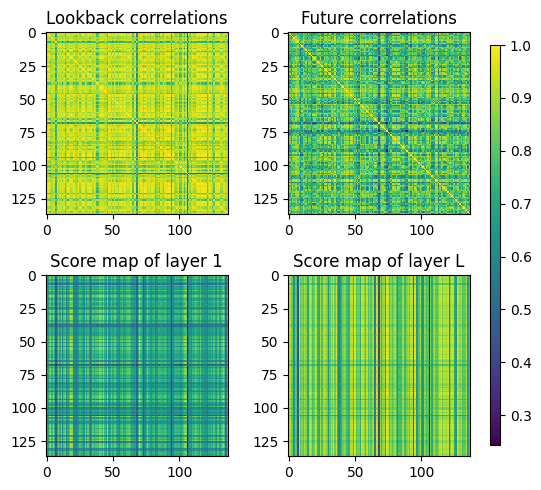

H :  1


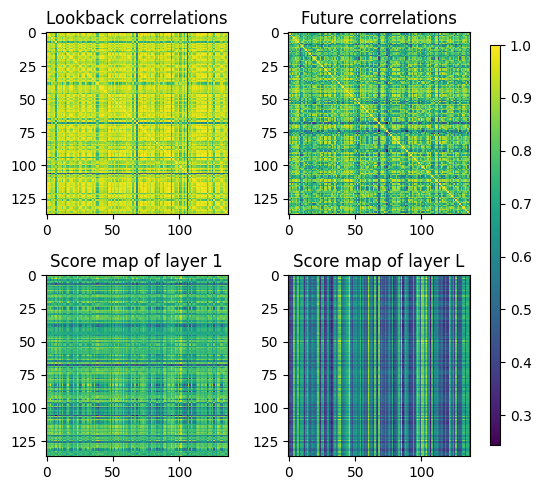

H :  2


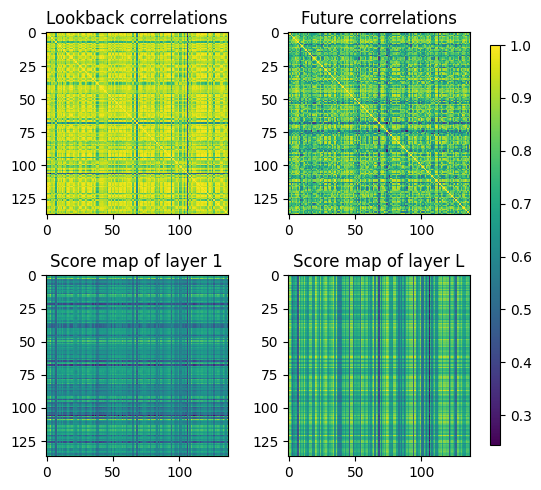

H :  3


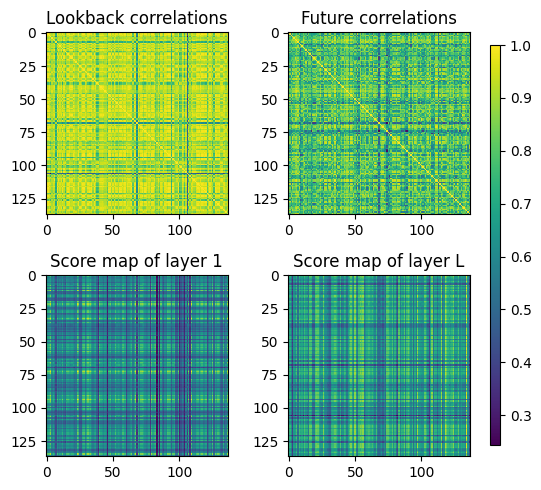

H :  4


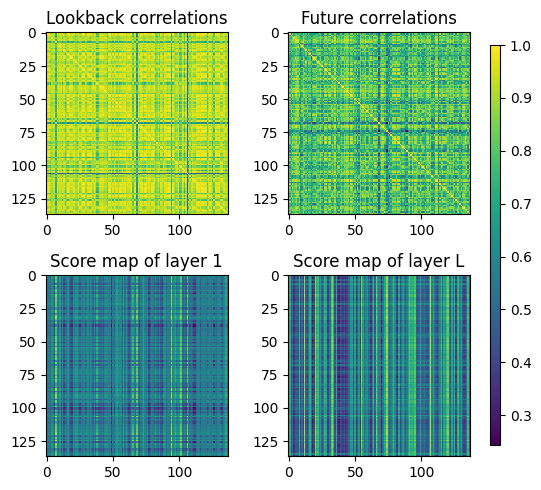

H :  5


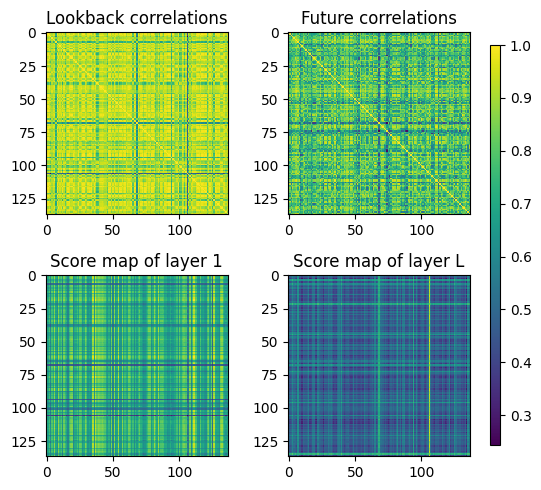

H :  6


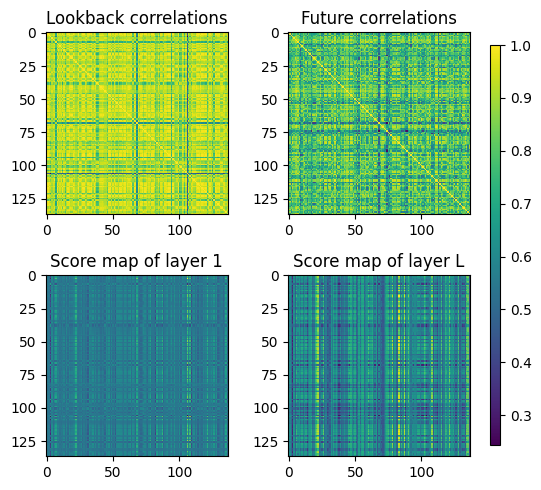

H :  7


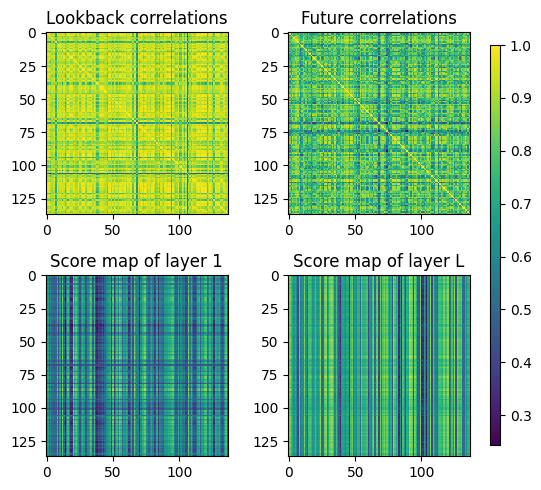

In [102]:
c_lookback = x[i,:,:].T.cpu()
corr_lookback = np.corrcoef(c_lookback)
c_lookforward = y[i,:,:].T.cpu()
corr_lookforward = np.corrcoef(c_lookforward)

for h in range(8): 
    print("H : ",h)
    Att1 = A1[:, h, :, :]
    Att2 = A2[:, h, :, :]
    
    fig = plt.figure(figsize=(5, 5))

    ax1 = plt.subplot2grid((2, 2), (0, 0))
    im1 = ax1.imshow(corr_lookback, cmap='viridis', interpolation='nearest')
    ax1.set_title('Lookback correlations')

    ax2 = plt.subplot2grid((2, 2), (0, 1))
    im2 = ax2.imshow(corr_lookforward, cmap='viridis', interpolation='nearest')
    ax2.set_title('Future correlations')
    ax3 = plt.subplot2grid((2, 2), (1, 0))
    
    im3 = ax3.imshow(Att1[i].detach().to('cpu'), cmap='viridis', interpolation='nearest')
    ax3.set_title('Score map of layer 1')

    ax4 = plt.subplot2grid((2, 2), (1, 1))
    im4 = ax4.imshow(Att2[i].detach().to('cpu'), cmap='viridis', interpolation='nearest')
    ax4.set_title('Score map of layer L')
    
    # Ajouter une colorbar commune à droite du graphique
    cbar_ax = fig.add_axes([1, 0.1, 0.02, 0.8])
    fig.colorbar(im1, cax=cbar_ax)

    # Ajuster l'espacement entre les subplots
    plt.tight_layout()

    # Afficher le graphique
    plt.show()

    

In [125]:
a = torch.randint(32, (5,))

In [127]:
for i, (x,y) in enumerate(test_loader) : 
    pass
print(i)

322
